## Importing Libraries

In [31]:
import requests
import csv
import json
import pandas as pd   
import numpy as np

## Data Gathering

We have three different sources in total but they are not ready to use. Therefore, we have to work on them. 

The first one is the WeRateDogs Twitter archive. It is a CSV file. 

In [32]:
df1 = pd.read_csv("twitter-archive-enhanced.csv")

The second one is tweet image predictions file. We have its url and download programmatically by using it. 

In [33]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
r = requests.get(url)

with open('image_predicitons', 'w') as f:
    writer = csv.writer(f)
    for line in r.iter_lines():
        writer.writerow(line.decode('utf-8').split('\t'))

df2 = pd.read_csv("image_predicitons")


The third one is the data gathered by using Twitter API. Unfortunately, my developer application is not accepted by Twitter so I have to use "tweet-json" text file directly. 

In [34]:
df_list = []

with open("tweet-json") as file:    
    for line in file:
        df_list.append({"tweet_id":json.loads(line)["id"],
                        "retweet_count" : json.loads(line)["retweet_count"],
                        "favorite_count": json.loads(line)["favorite_count"]})
    
df3 = pd.DataFrame(df_list)


In [35]:
# import tweepy
# from tweepy import OAuthHandler
# import json
# from timeit import default_timer as timer

# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = df1.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)


## Data Assesing 

In [36]:
df1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https:/...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https:/...",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https:/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H htt...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""htt

In [37]:
df2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [38]:
df3

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256
5,20562,3261,891087950875897856
6,12041,2158,890971913173991426
7,56848,16716,890729181411237888
8,28226,4429,890609185150312448
9,32467,7711,890240255349198849


In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [40]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [41]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


No duplicated tweets in any dataset. 

In [42]:
df1.duplicated(subset="tweet_id").sum()

0

In [43]:
df2.duplicated(subset="tweet_id").sum()

0

In [44]:
df3.duplicated(subset="tweet_id").sum()

0

In [45]:
df3["favorite_count"].sort_values(ascending=False).head()

412     132810
1037    131075
65      107956
533     107015
134     106827
Name: favorite_count, dtype: int64

There is an extra part (**"+0000"**) in the all rows of `timestamp` column in the `df1` dataset. It can be removed.  

In [46]:
df1['timestamp'].str.split(" ").str[2].value_counts()

+0000    2356
Name: timestamp, dtype: int64

There are several erroneous names in `name` column of `df1`.

In [47]:
df1["name"][df1["name"].str[0].str.islower()].value_counts()

a               55
the              8
an               7
very             5
just             4
quite            4
one              4
actually         2
mad              2
getting          2
not              2
all              1
unacceptable     1
this             1
my               1
his              1
life             1
such             1
infuriating      1
old              1
space            1
by               1
incredibly       1
light            1
officially       1
Name: name, dtype: int64

Some dog ratings are decimals.

In [48]:
pd.set_option('display.max_colwidth', 150)
df1[df1.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,text,rating_numerator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://...,27
1689,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26


#### Quality

##### `df1` table
- Missing values (`retweeted_status_id`, `retweeted_status_id`, `retweeted_status_timestamp` and `expanded_urls`)
- Erroneous dataype (`tweet_id`, `timestap`) 
- Gibberish values (`source`)
- Phrase  of "+0000" (`timestamp column`)
- Erroneous dog names (`name`)
- Decimal dog ratings (`text`)


##### `df2` table
- Erroneous dataype (`tweet_id`, `p*`) 
- Unclear column names (`p*` `p*_conf`)
- Some values of `p*` columns are not a dog brent
- Data format (`p*`)

##### `df3` table
- Erroraneous datatype (`tweet_id`, `retweet_count`, `favorite_count`) 

#### Tidiness 

##### `df1` table
- Two vairables in one column (`timestamp`)
- Dog stages in four columns instead of one
- `df1` and `df3` data sets should be united for further analysis

##### `df2` table
- `df2` and `df3` data sets should be united for further analysis

## Data Cleaning

In [49]:
df1_clean = df1.copy()
df2_clean = df2.copy()
df3_clean = df3.copy()

### Missing Data

#### Missing values (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_id, retweeted_status_timestamp and expanded_urls)

##### Define

Remove rows where `retweeted_status_id`, `retweeted_status_id` and `retweeted_status_timestamp` columns are non-empty.

Remove `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_id` and
`retweeted_status_timestamp` columns. Very few rows of these columns contain values campared to all length of column. Somehow it is not possible to fill in the escaped values. Therefore, they can be removed.

Remove rows where `expanded_urls` values are missing.

##### Code

In [50]:
df1_clean = df1_clean[df1_clean["retweeted_status_id"].isnull()]
df1_clean.drop(["in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", 
                "retweeted_status_user_id", "retweeted_status_timestamp"], axis=1, inplace=True)
df1_clean = df1_clean[df1_clean["expanded_urls"].notnull()]

In [51]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2117 non-null int64
timestamp             2117 non-null object
source                2117 non-null object
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  2117 non-null object
doggo                 2117 non-null object
floofer               2117 non-null object
pupper                2117 non-null object
puppo                 2117 non-null object
dtypes: int64(3), object(9)
memory usage: 215.0+ KB


### Tidiness

#### Two vairables in one column (`timestamp`)

##### Define 

Seperate date and time variables into columns. 

##### Code

In [52]:
df1_clean["date"] = df1_clean['timestamp'].str.split(" ").str[0]
df1_clean["time"] = df1_clean['timestamp'].str.split(" ").str[1]
df1_clean.drop("timestamp", axis=1, inplace=True)

##### Test

In [53]:
df1_clean.head()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,2017-08-01,16:23:56
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https:/...",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,2017-08-01,00:17:27
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,2017-07-31,00:18:03
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None,2017-07-30,15:58:51
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https:/...","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None,2017-07-29,16:00:24


#### Dog stages in four columns instead of one

##### Define

Collect all dog stages under one column

##### Code

In [54]:
# handle none
df1_clean.doggo.replace('None', '', inplace=True)
df1_clean.floofer.replace('None', '', inplace=True)
df1_clean.pupper.replace('None', '', inplace=True)
df1_clean.puppo.replace('None', '', inplace=True)

# merge into column
df1_clean['dog_stages'] = df1_clean.doggo + df1_clean.floofer + df1_clean.pupper + df1_clean.puppo

# handle multiple stages
df1_clean.loc[df1_clean.dog_stages == 'doggopupper', 'dog_stages'] = 'doggo, pupper'
df1_clean.loc[df1_clean.dog_stages == 'doggopuppo', 'dog_stages'] = 'doggo, puppo'
df1_clean.loc[df1_clean.dog_stages == 'doggofloofer', 'dog_stages'] = 'doggo, floofer'

# handle missing values
df1_clean.loc[df1_clean.dog_stages == '', 'dog_stages'] = np.nan

##### Test

In [55]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id              2117 non-null int64
source                2117 non-null object
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  2117 non-null object
doggo                 2117 non-null object
floofer               2117 non-null object
pupper                2117 non-null object
puppo                 2117 non-null object
date                  2117 non-null object
time                  2117 non-null object
dog_stages            338 non-null object
dtypes: int64(3), object(11)
memory usage: 248.1+ KB


I am aware that the number of rows of the `df1_clean` dataset has increased from 2297 to 2311. This is because some tweets have more than one dog stage. This can be seen below.

This is not critical because I will analyse based on dog stages at the end of the data claening. 

In [56]:
df1_clean[df1_clean.duplicated(subset="tweet_id", keep=False)][["tweet_id","dog_stages"]].sort_values("tweet_id")

,tweet_id,dog_stages


#### `df1`, `df2` and `df3` data sets should be united for further analysis

##### Define

Combine `df1`, `df2` and `df3` data sets. 

##### Code

In [57]:
df1_clean = df1_clean.merge(df2_clean, on="tweet_id")
df1_clean = df1_clean.merge(df3_clean, on="tweet_id")

##### Test

In [58]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 27 columns):
tweet_id              1994 non-null int64
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
date                  1994 non-null object
time                  1994 non-null object
dog_stages            306 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null flo

### Quality

#### Gibberish values  in `df1` (`source`)

##### Define

Clean unnecessary parts of `source` column.

##### Code


In [59]:
df1_clean["source"] = df1_clean["source"].str.split('"').str[1]

##### Test

In [60]:
df1_clean["source"]

0       http://twitter.com/download/iphone
1       http://twitter.com/download/iphone
2       http://twitter.com/download/iphone
3       http://twitter.com/download/iphone
4       http://twitter.com/download/iphone
5       http://twitter.com/download/iphone
6       http://twitter.com/download/iphone
7       http://twitter.com/download/iphone
8       http://twitter.com/download/iphone
9       http://twitter.com/download/iphone
10      http://twitter.com/download/iphone
11      http://twitter.com/download/iphone
12      http://twitter.com/download/iphone
13      http://twitter.com/download/iphone
14      http://twitter.com/download/iphone
15      http://twitter.com/download/iphone
16      http://twitter.com/download/iphone
17      http://twitter.com/download/iphone
18      http://twitter.com/download/iphone
19      http://twitter.com/download/iphone
20      http://twitter.com/download/iphone
21      http://twitter.com/download/iphone
22      http://twitter.com/download/iphone
23      htt

#### Unclear column names (`p*` `p*_conf`)

##### Define

Replace name of `p*` and `p*_conf` columns as descriptive ones  

##### Code

In [61]:
df1_clean.rename(columns={"p1": "breed", "p2": "breed_2", "p3": "breed_3",
                          "p1_conf": "breed_prob", "p2_conf": "breed_2_prob", "p3_conf": "breed_3_prob"}, inplace=True)

##### Test

In [62]:
list(df1_clean)

['tweet_id',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'date',
 'time',
 'dog_stages',
 'jpg_url',
 'img_num',
 'breed',
 'breed_prob',
 'p1_dog',
 'breed_2',
 'breed_2_prob',
 'p2_dog',
 'breed_3',
 'breed_3_prob',
 'p3_dog',
 'favorite_count',
 'retweet_count']

#### Some values of `p*` columns are not a dog brent

##### Define

Three options are given for each picture. If the option is a dog breed, it is shown with *True*, otherwise *False* in `p*_dog` columns. 

Define the breed as "not identified" if neither option is a dog breed. 

Otherwise, chose the most likely dog breed.

##### Code


In [63]:
mask = df1_clean[["p1_dog", "p2_dog","p3_dog"]].sum(axis=1)==0
df1_clean.loc[mask, "breed"] = "not_identified"
df1_clean.loc[mask, "breed_prob"] = 0

In [64]:
mask = (df1_clean["p1_dog"]==False) & (df1_clean["p2_dog"]==True)
df1_clean.loc[mask, "breed"] = df1_clean.query('p1_dog==False and p2_dog==True')["breed_2"]
df1_clean.loc[mask, "breed_prob"] = df1_clean.query('p1_dog==False and p2_dog==True')["breed_2_prob"]

In [65]:
mask = (df1_clean["p1_dog"]==False) & (df1_clean["p2_dog"]==False) & (df1_clean["p3_dog"]==True)
df1_clean.loc[mask, "breed"] = df1_clean.query('p1_dog==False and p2_dog==False and p3_dog==True')["breed_3"]
df1_clean.loc[mask, "breed_prob"] = df1_clean.query('p1_dog==False and p2_dog==False and p3_dog==True')["breed_3_prob"]

Drop unneccesary columns. 

In [66]:
df1_clean = df1_clean.drop(['p1_dog', 'breed_2', 'breed_2_prob', 'p2_dog', 'breed_3', 'breed_3_prob', 'p3_dog'], axis=1)

##### Test

In [67]:
df1_clean["breed"].value_counts()

not_identified                 308
golden_retriever               158
Labrador_retriever             108
Pembroke                        95
Chihuahua                       91
pug                             62
toy_poodle                      51
chow                            48
Pomeranian                      42
Samoyed                         42
malamute                        33
Chesapeake_Bay_retriever        31
French_bulldog                  31
cocker_spaniel                  30
miniature_pinscher              25
Eskimo_dog                      22
Staffordshire_bullterrier       21
German_shepherd                 21
Cardigan                        21
Siberian_husky                  20
beagle                          20
Shih-Tzu                        20
Maltese_dog                     19
Rottweiler                      19
Shetland_sheepdog               19
kuvasz                          18
Lakeland_terrier                18
basset                          17
Italian_greyhound   

#### Erroraneous dataypes (`tweet_id`, `favorite_count`, `retweet_count`) 

##### Define

Change datatype of `tweet_id` as string

Change datatype of `favorite_count` as int

Change datatype of `retweet_count`  as int

Change datatype of `date` and `time`  as datatime

##### Code


In [68]:
df1_clean["tweet_id"] = df1_clean["tweet_id"].astype("str")
df1_clean["favorite_count"] = df1_clean["favorite_count"].astype("int")
df1_clean["retweet_count"] = df1_clean["retweet_count"].astype("int")
df1_clean["date"] = pd.to_datetime(df1_clean["date"])
df1_clean["time"] = pd.to_datetime(df1_clean["time"])

##### Test

In [69]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 20 columns):
tweet_id              1994 non-null object
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
date                  1994 non-null datetime64[ns]
time                  1994 non-null datetime64[ns]
dog_stages            306 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
breed                 1994 non-null object
breed_prob            1994 non-null float64
favorite_count        1994 non-null int64
retweet_count         1994 non-null int64
dtypes: datetime64[ns]

#### Data format in `df2` (`breed`)

##### Define

Standardise value format in `breed` column. 

##### Code

In [70]:
df1_clean["breed"] = df1_clean["breed"].str.title().str.replace("_", " ")

##### Test

In [71]:
df1_clean.head(10)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time,dog_stages,jpg_url,img_num,breed,breed_prob,favorite_count,retweet_count
0,892420643555336193,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,,,,,2017-08-01,2021-02-24 16:23:56,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Not Identified,0.000000,39467,8853
1,892177421306343426,http://twitter.com/download/iphone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https:/...",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,,,,,2017-08-01,2021-02-24 00:17:27,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,33819,6514
2,891815181378084864,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,,,,,2017-07-31,2021-02-24 00:18:03,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,25461,4328
3,891689557279858688,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,,,,,2017-07-30,2021-02-24 15:58:51,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador Retriever,0.168086,42908,8964
4,891327558926688256,http://twitter.com/download/iphone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https:/...","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,,,,,2017-07-29,2021-02-24 16:00:24,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,41048,9774
5,891087950875897856,http://twitter.com/download/iphone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https:/...,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,,,,,2017-07-29,2021-02-24 00:08:17,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake Bay Retriever,0.425595,20562,3261
6,890971913173991426,http://twitter.com/download/iphone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H htt...,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,,,,,2017-07-28,2021-02-24 16:27:12,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,12041,2158
7,890729181411237888,http://twitter.com/download/iphone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,,,,,2017-07-28,2021-02-24 00:22:40,NaN,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,56848,16716
8,890609185150312448,http://twitter.com/download/iphone,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,,,,,2017-07-27,2021-02-24 16:25:51,NaN,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish Terrier,0.487574,28226,4429
9,890240255349198849,http://twitter.com/download/iphone,This is Cassie. She is a coll

#### Erroneous dog names (name)

##### Define

Remove values which are not a name in `name` column

##### Code

In [72]:
mask = df1_clean["name"].str[0].str.islower()
df1_clean.loc[mask, "name"] = "None"

mask = df1_clean["name"]=="None"
df1_clean.loc[mask, "name"] = np.nan

##### Test

In [73]:
df1_clean["name"].value_counts()

Charlie      11
Oliver       10
Cooper       10
Lucy         10
Penny         9
Tucker        9
Winston       8
Sadie         8
Daisy         7
Toby          7
Lola          7
Koda          6
Bo            6
Bella         6
Stanley       6
Jax           6
Chester       5
Leo           5
Bailey        5
Buddy         5
Scout         5
Rusty         5
Oscar         5
Dave          5
Milo          5
Louis         5
Phil          4
Chip          4
Brody         4
Winnie        4
             ..
Charl         1
Levi          1
Maddie        1
Brockly       1
Stella        1
Philbert      1
Obie          1
Eevee         1
Bloo          1
Mack          1
Jeremy        1
Ralphie       1
Stephanus     1
Baron         1
Nimbus        1
Timber        1
Biden         1
Bloop         1
Dixie         1
General       1
Leonard       1
Butters       1
Keurig        1
Jeffri        1
Eve           1
Chevy         1
Grizz         1
Jockson       1
Caryl         1
Ace           1
Name: name, Length: 913,

#### Decimal dog ratings

##### Define

Remove rows with decimal dog ratings.

##### Code

In [92]:
ind = df1_clean.loc[df1_clean.text.str.contains(r"(\d+\.\d*\/\d+)"),['text', 'rating_numerator']].index
df1_clean.drop(index=ind, inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


##### Test

In [93]:
df1_clean.loc[df1_clean.text.str.contains(r"(\d+\.\d*\/\d+)"),['text', 'rating_numerator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,text,rating_numerator


## Analyzing and Visiualizing Data

#### At which stages are dogs most shared?

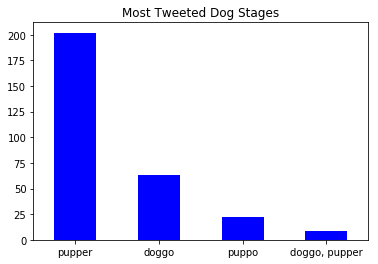

In [98]:
df1_clean["dog_stages"].value_counts().head(4).plot(kind="bar", rot=0, color="b", title="Most Tweeted Dog Stages");

It seems that puppies are shared more than others combined.

#### What are the top 10 most tweeted dog breeds?

We select rows whose prediction accuracy is higher than 80%.

In [95]:
most_tweeted_brends = df1_clean.query('breed_prob>0.8').groupby("breed").count()["tweet_id"].sort_values(ascending=False).head(10)
most_tweeted_brends

breed
Golden Retriever      63
Pembroke              38
Labrador Retriever    33
Pug                   31
Pomeranian            22
Samoyed               22
Chihuahua             19
Chow                  16
French Bulldog        14
Toy Poodle            11
Name: tweet_id, dtype: int64

#### What are the average likes of the 10 most tweeted dog breeds?

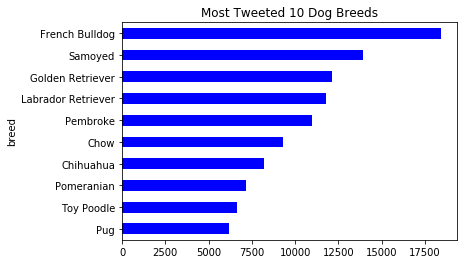

In [96]:
df1_clean.query('breed in @most_tweeted_brends.index').groupby("breed").mean()["favorite_count"].sort_values().plot(kind="barh", color="b", title="Most Tweeted 10 Dog Breeds");

#### What is the relationship between favorite and retweet numbers?

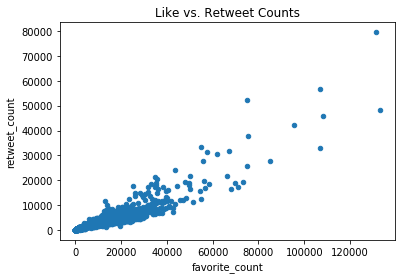

In [97]:
df1_clean.plot.scatter(x='favorite_count', y='retweet_count', title="Like vs. Retweet Counts");

There is a strong positive correlation between retweet and favorite counts. 

## Storing Files

In [99]:
df1_clean.to_csv("twitter_archive_master.csv", index=False)